# 1 mse loss representation -CWRU task

## prepare

In [1]:
import argparse
import os
import sys
import yaml
from pprint import pprint
# 将项目根目录添加到 sys.path
project_root = '/home/lq/LQcode/2_project/PHMBench/PHM-Vibench/'
if project_root not in sys.path:
    sys.path.insert(0, project_root)
import torch
import pandas as pd
from pytorch_lightning import seed_everything

from src.utils.config_utils import load_config, path_name, transfer_namespace
from src.utils.utils import init_lab
from src.data_factory import build_data
from src.model_factory import build_model
%load_ext autoreload
%autoreload 2

/home/lq/.conda/envs/P/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
!CUDA_VISIBLE_DEVICES=1
!nvidia-smi

### plot——setting

In [3]:
from plot.A1_plot_config import configure_matplotlib
configure_matplotlib(style='no-latex', font_lang='en', seaborn_theme=False, font_scale=1.4)


In [4]:
import matplotlib.font_manager
from pprint import pprint

# 获取 Matplotlib 字体管理器中所有已注册的字体家族名称
# 使用 set 来确保每个字体名称只出现一次，然后排序
font_names = sorted({
    font.name for font in matplotlib.font_manager.fontManager.ttflist
})

print("Matplotlib 在您的系统上可以使用的字体家族:")
pprint(font_names)

Matplotlib 在您的系统上可以使用的字体家族:
['Abyssinica SIL',
 'Ani',
 'AnjaliOldLipi',
 'C059',
 'Chandas',
 'Chilanka',
 'D050000L',
 'DejaVu Math TeX Gyre',
 'DejaVu Sans',
 'DejaVu Sans Display',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'DejaVu Serif Display',
 'Dhurjati',
 'Droid Sans Fallback',
 'Dyuthi',
 'FreeMono',
 'FreeSans',
 'FreeSerif',
 'Gargi',
 'Garuda',
 'Gayathri',
 'Gidugu',
 'Gubbi',
 'Gurajada',
 'Jamrul',
 'KacstArt',
 'KacstBook',
 'KacstDecorative',
 'KacstDigital',
 'KacstFarsi',
 'KacstLetter',
 'KacstNaskh',
 'KacstOffice',
 'KacstOne',
 'KacstPen',
 'KacstPoster',
 'KacstQurn',
 'KacstScreen',
 'KacstTitle',
 'KacstTitleL',
 'Kalapi',
 'Kalimati',
 'Karumbi',
 'Keraleeyam',
 'Khmer OS',
 'Khmer OS System',
 'Kinnari',
 'LKLUG',
 'LakkiReddy',
 'Laksaman',
 'Liberation Mono',
 'Liberation Sans',
 'Liberation Sans Narrow',
 'Liberation Serif',
 'Likhan',
 'Lohit Assamese',
 'Lohit Bengali',
 'Lohit Devanagari',
 'Lohit Gujarati',
 'Lohit Gurmukhi',
 'Lohit Kannada',
 'Lohit M

### data

In [5]:
# 解析命令行参数
parser = argparse.ArgumentParser(description="实验流水线")

parser.add_argument('--config_path', 
                    type=str, 
                    default='/home/lq/LQcode/2_project/PHMBench/PHM-Vibench/configs/dev/exp1_mse_lossforgeneration.yaml',
                    help='配置文件路径')
parser.add_argument('--notes', 
                    type=str, 
                    default='exp1_mse_vs_flow',
                    help='实验备注')

# 在Jupyter环境中，使用默认参数或手动设置
# args = parser.parse_args()
args = parser.parse_args(args=[]) # 使用默认值

# 执行流水线
"""
实验流水线，负责加载配置、数据和模型。
"""
# -----------------------
# 1. 加载配置文件
# -----------------------
config_path = args.config_path
print(f"[INFO] 加载配置文件: {config_path}")
configs = load_config(config_path)


# 设置环境变量和命名空间
args_environment = transfer_namespace(configs.get('environment', {}))
args_data = transfer_namespace(configs.get('data', {}))
args_model = transfer_namespace(configs.get('model', {}))
args_task = transfer_namespace(configs.get('task', {}))



# -----------------------
# 2. 准备实验环境和数据
# -----------------------
# 仅使用第一次迭代进行设置
it = 0
print(f"\n{'='*50}\n[INFO] 准备实验环境 (基于迭代 {it+1})\n{'='*50}")

# 设置路径和名称
path, name = path_name(configs, it)

# 设置随机种子
current_seed = args_environment.seed + it
seed_everything(current_seed)
print(f"[INFO] 设置随机种子: {current_seed}")

# 初始化 wandb/swanlab
# init_lab(args_environment, args, name)




    

Seed set to 42


[INFO] 加载配置文件: /home/lq/LQcode/2_project/PHMBench/PHM-Vibench/configs/dev/exp1_mse_lossforgeneration.yaml
/home/lq/LQcode/2_project/PHMBench/PHM-Vibench/dev/preexp

[INFO] 准备实验环境 (基于迭代 1)
[INFO] 设置随机种子: 42


In [6]:
# 构建数据工厂
print("[INFO] 构建数据工厂...")
data_factory = build_data(args_data, args_task)

[INFO] 构建数据工厂...
[INFO] 检查缓存文件: 数据文件已存在: /mnt/crucial/LQ/PHM-Vibench/metadata_6_11.xlsx 
[SUCCESS] 成功加载元数据，共 49867 条记录
筛选前元数据行数: 49867
筛选后元数据行数: 150
检查并准备各 Name.h5 缓存文件...


检查 Name.h5 缓存: 100%|██████████| 150/150 [00:00<00:00, 5051.07it/s]


正在将数据整合到任务缓存文件: /mnt/crucial/LQ/PHM-Vibench/cache.h5 ...


检查 cache.h5 是否已存在: 100%|██████████| 150/150 [00:00<00:00, 93511.53it/s]


数据整合完成。最终缓存文件: /mnt/crucial/LQ/PHM-Vibench/cache.h5
Using default task.
DG划分 - 使用 target_domain_num=1 进行动态划分
  - 训练域: [np.float64(0.0), np.float64(1.0), np.float64(2.0)]
  - 测试域: [np.float64(3.0)]
训练/验证样本数: 113
测试样本数: 37
Initializing training and validation datasets...


Creating train/val datasets: 100%|██████████| 113/113 [00:03<00:00, 32.47it/s]


Initializing test datasets...


Creating test datasets: 100%|██████████| 37/37 [00:00<00:00, 53.23it/s]


### model

In [7]:
# 构建模型
print("[INFO] 构建模型...")
model = build_model(args_model, metadata=data_factory.get_metadata())

print("[INFO] 模型和数据加载完成。")

[INFO] 构建模型...
成功导入模型模块: M_02_ISFM
[INFO] 模型和数据加载完成。


## before pretraining umap

In [11]:
train_dataset = data_factory.get_dataset('train')
val_dataset = data_factory.get_dataset('val')
test_dataset = data_factory.get_dataset('test')

In [10]:
train_data_loader = data_factory.get_dataloader('train')
val_data_loader = data_factory.get_dataloader('val')
test_data_loader = data_factory.get_dataloader('test')

In [ ]:
import torch
import numpy as np
import umap
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

all_embeddings = []
all_labels = []

# 获取测试数据集的元数据
# 假设测试集只有一个任务/数据集，我们获取其名称和采样频率

# --- 2. 遍历数据加载器并提取特征 ---
with torch.no_grad():
    for batch in tqdm(test_data_loader, desc="提取特征中"):
        x = batch['x']
        y = batch['y']

        # 每个 batch 随机抽取2个样本
        if x.shape[0] > 2:
            indices = torch.randperm(x.shape[0])[:10]
            x_sample = x[indices]
            y_sample = y[indices]
        else:
            x_sample = x
            y_sample = y
        
        all_embeddings.append(x_sample)
        all_labels.append(y_sample)

# --- 3. 整合数据并进行 UMAP 降维 ---
# 将列表合并为大的 numpy 数组
all_embeddings = np.concatenate(all_embeddings, axis=0)
all_labels = np.concatenate(all_labels, axis=0)





提取特征中: 100%|██████████| 37/37 [00:00<00:00, 131.36it/s]


### umap

In [27]:
print(f"UMAP 降维中，样本总数: {all_embeddings.shape[0]}...")
# 初始化并执行 UMAP
reducer = umap.UMAP(n_neighbors=50, min_dist=0.1, n_components=2, random_state=42)
embedding_2d = reducer.fit_transform(all_embeddings.reshape(all_embeddings.shape[0], -1))

UMAP 降维中，样本总数: 370...


/home/lq/.conda/envs/P/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/lq/.conda/envs/P/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


### plot

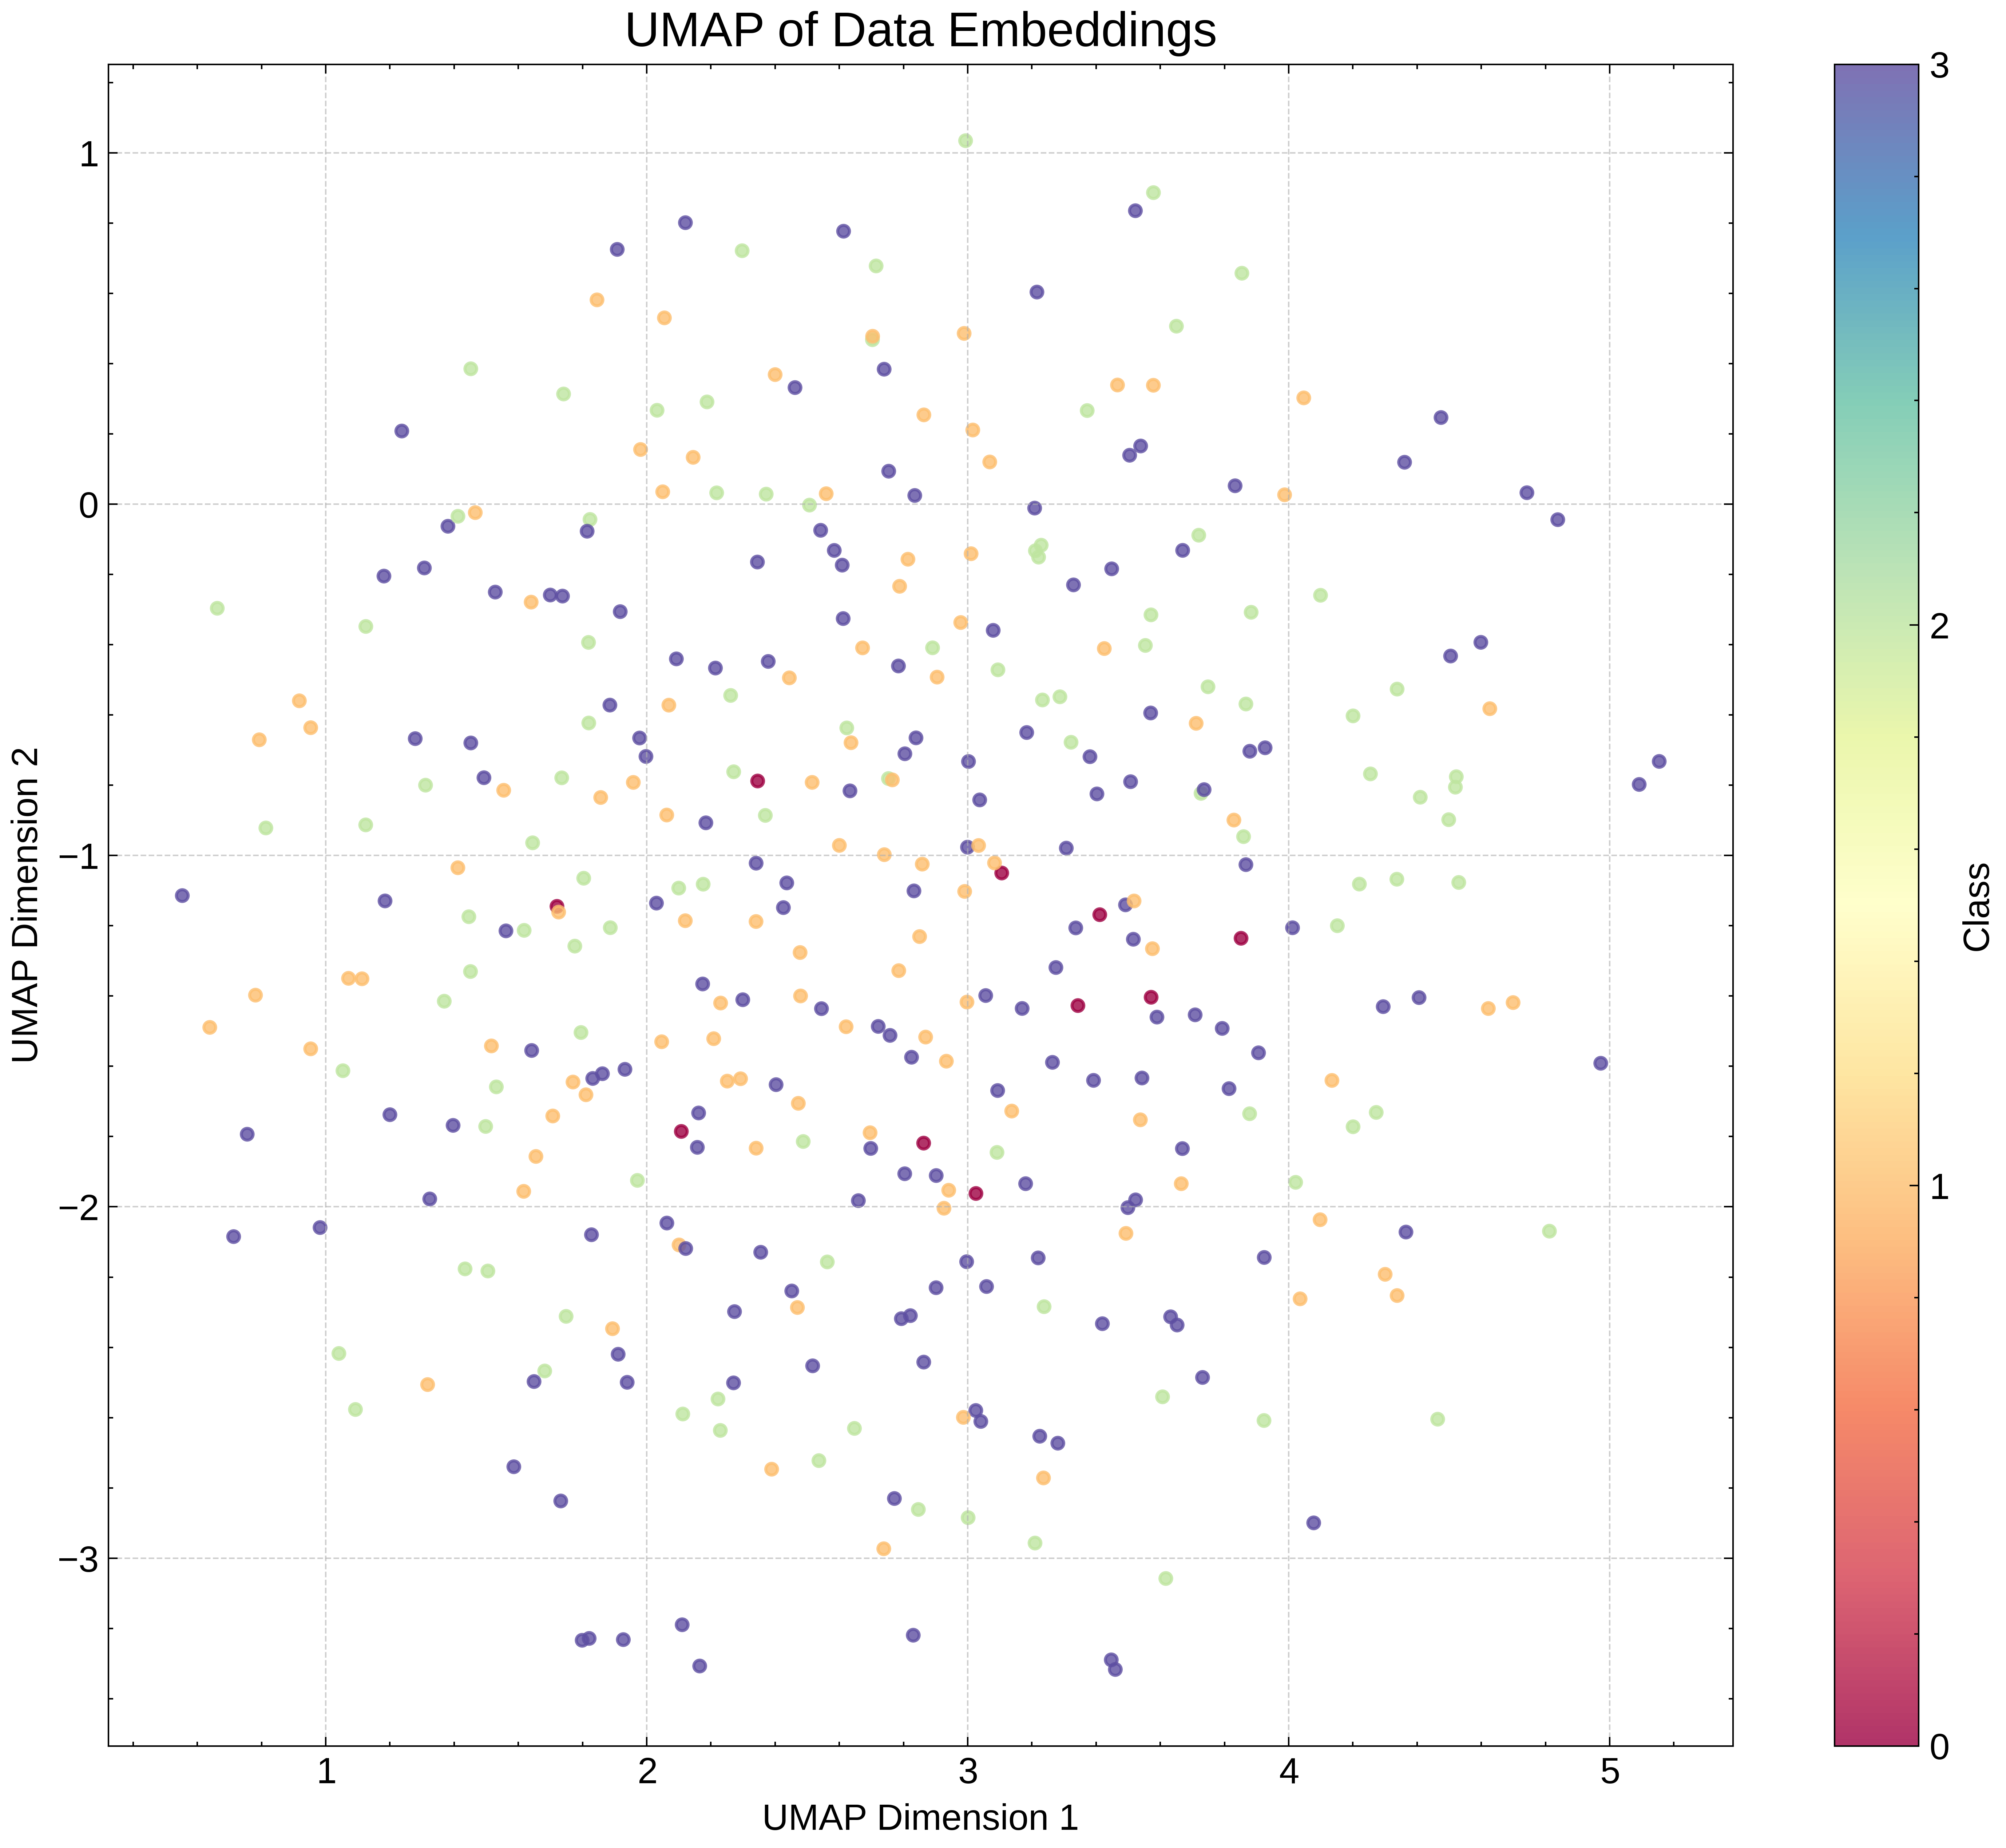

In [29]:
# --- 4. 绘制降维结果 ---
plt.figure(figsize=(12, 10))
scatter = plt.scatter(
    embedding_2d[:, 0],
    embedding_2d[:, 1],
    c=all_labels,
    cmap='Spectral',  # 使用 'Spectral' 或 'viridis' 等颜色映射
    s=15,             # 点的大小
    alpha=0.8         # 透明度
)

# 添加颜色条
num_classes = len(np.unique(all_labels))
cbar = plt.colorbar(scatter, ticks=np.unique(all_labels))
cbar.set_label('Class')

plt.title(f'UMAP of Data Embeddings', fontsize=16)
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('save/umap_embedding.png', dpi=300, bbox_inches='tight')  # 保存图像
plt.savefig('save/umap_embedding.pdf', dpi=300, bbox_inches='tight')  # 保存图像为 PDF
plt.show()

## pretraining|MSE

### training

In [26]:
# --- 1. MSE 训练循环用于信号重构 ---
from tqdm.auto import tqdm
import torch
import torch.nn as nn
import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
print("\n--- 开始使用 MSE Loss 进行重构训练 ---")
learning_rate = 1e-3
epochs = 10  # 为演示设置较少的训练轮数
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
model.train()  # 将模型设置为训练模式
task_id = args_task.name
for epoch in range(epochs):
    running_loss = 0.0
    for batch in tqdm(train_data_loader, desc=f"Epoch {epoch+1}/{epochs}"):
        x = batch['x'].to(device)
        file_id = batch['file_id'] if 'file_id' in batch else None
        
        # 清零梯度
        optimizer.zero_grad()
        
        # 前向传播：获取重构信号 (假设模型是自编码器结构)
        reconstructed_x = model(x, file_id=file_id, task_id=task_id)  # 如果模型需要 file_id

        # 计算损失
        loss = criterion(reconstructed_x, x)
        
        # 反向传播和优化
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    epoch_loss = running_loss / len(train_data_loader)
    print(f"Epoch {epoch+1} 完成. 平均损失: {epoch_loss:.6f}")

print("--- 训练完成 ---")


--- 开始使用 MSE Loss 进行重构训练 ---


Epoch 1/10: 100%|██████████| 360/360 [00:05<00:00, 61.61it/s]


Epoch 1 完成. 平均损失: 0.270676


Epoch 2/10: 100%|██████████| 360/360 [00:05<00:00, 62.58it/s]


Epoch 2 完成. 平均损失: 0.109493


Epoch 3/10: 100%|██████████| 360/360 [00:05<00:00, 62.62it/s]


Epoch 3 完成. 平均损失: 0.089425


Epoch 4/10: 100%|██████████| 360/360 [00:05<00:00, 62.56it/s]


Epoch 4 完成. 平均损失: 0.078947


Epoch 5/10: 100%|██████████| 360/360 [00:05<00:00, 62.46it/s]


Epoch 5 完成. 平均损失: 0.072651


Epoch 6/10: 100%|██████████| 360/360 [00:05<00:00, 62.77it/s]


Epoch 6 完成. 平均损失: 0.068164


Epoch 7/10: 100%|██████████| 360/360 [00:05<00:00, 62.15it/s]


Epoch 7 完成. 平均损失: 0.064578


Epoch 8/10: 100%|██████████| 360/360 [00:05<00:00, 61.60it/s]


Epoch 8 完成. 平均损失: 0.061659


Epoch 9/10: 100%|██████████| 360/360 [00:05<00:00, 62.43it/s]


Epoch 9 完成. 平均损失: 0.059561


Epoch 10/10: 100%|██████████| 360/360 [00:05<00:00, 62.67it/s]

Epoch 10 完成. 平均损失: 0.057433
--- 训练完成 ---


### 重构图

In [37]:
# --- 2. 为每个类别绘制一个样本的重构图 ---
import matplotlib.pyplot as plt
import numpy as np

print("\n--- 绘制重构结果图 ---")
model.eval()  # 将模型设置为评估模式
samples_to_plot = {}
# 假设 test_dataset.labels 存在，如果不存在，需要遍历一次 test_loader 来获取
unique_labels = [0,1,2,3]
num = 1
# 从测试集中为每个类别寻找一个样本
with torch.no_grad():
    for batch in test_data_loader:
        x_batch, y_batch = batch['x'], batch['y']

        label = y_batch.to(device)[:num]
        if label not in samples_to_plot.keys():
            x = x_batch.to(device)[:num]  # 只取一个样本
            file_id = batch['file_id'][:num]
            reconstructed_tensor = model(x, file_id=file_id, task_id='prediction')
            reconstructed_tensor = reconstructed_tensor.squeeze().cpu().numpy()
            error = x.squeeze().cpu().numpy() - reconstructed_tensor
            samples_to_plot[str(label.item())] = (x, reconstructed_tensor, error)




--- 绘制重构结果图 ---


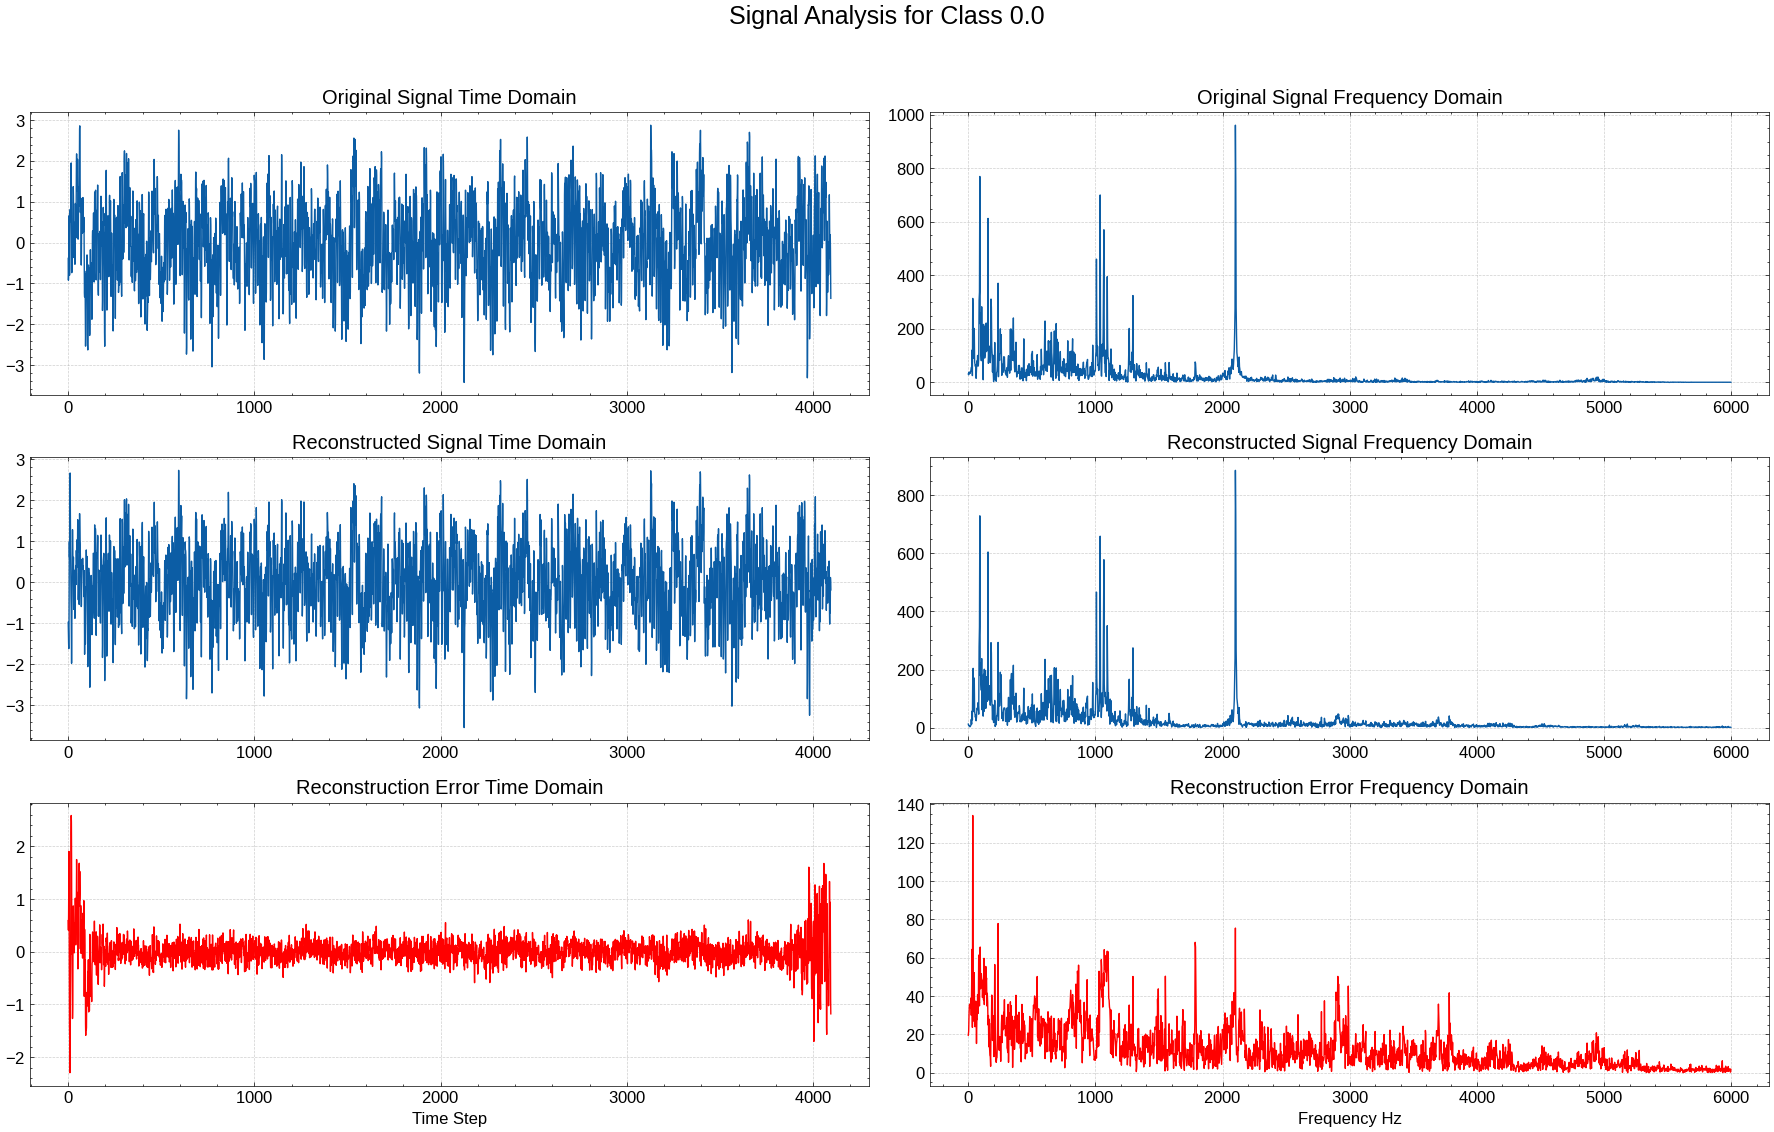

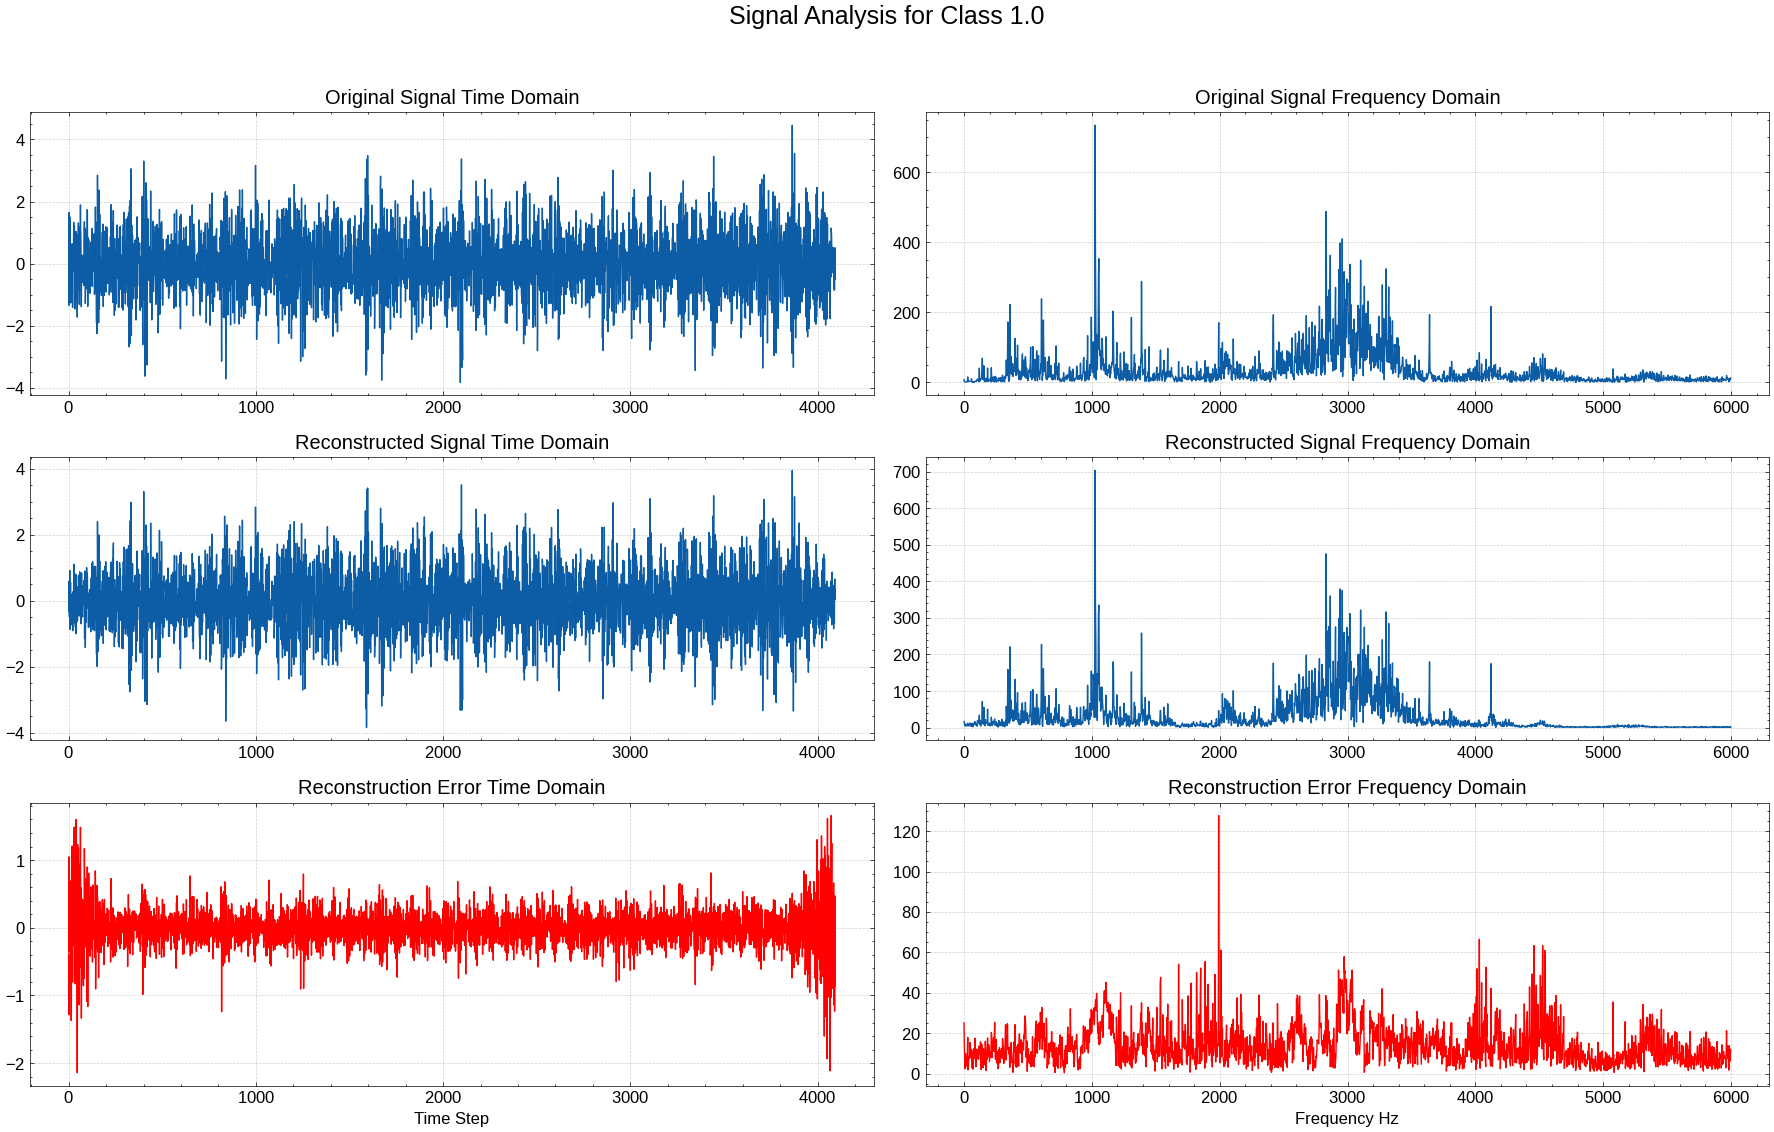

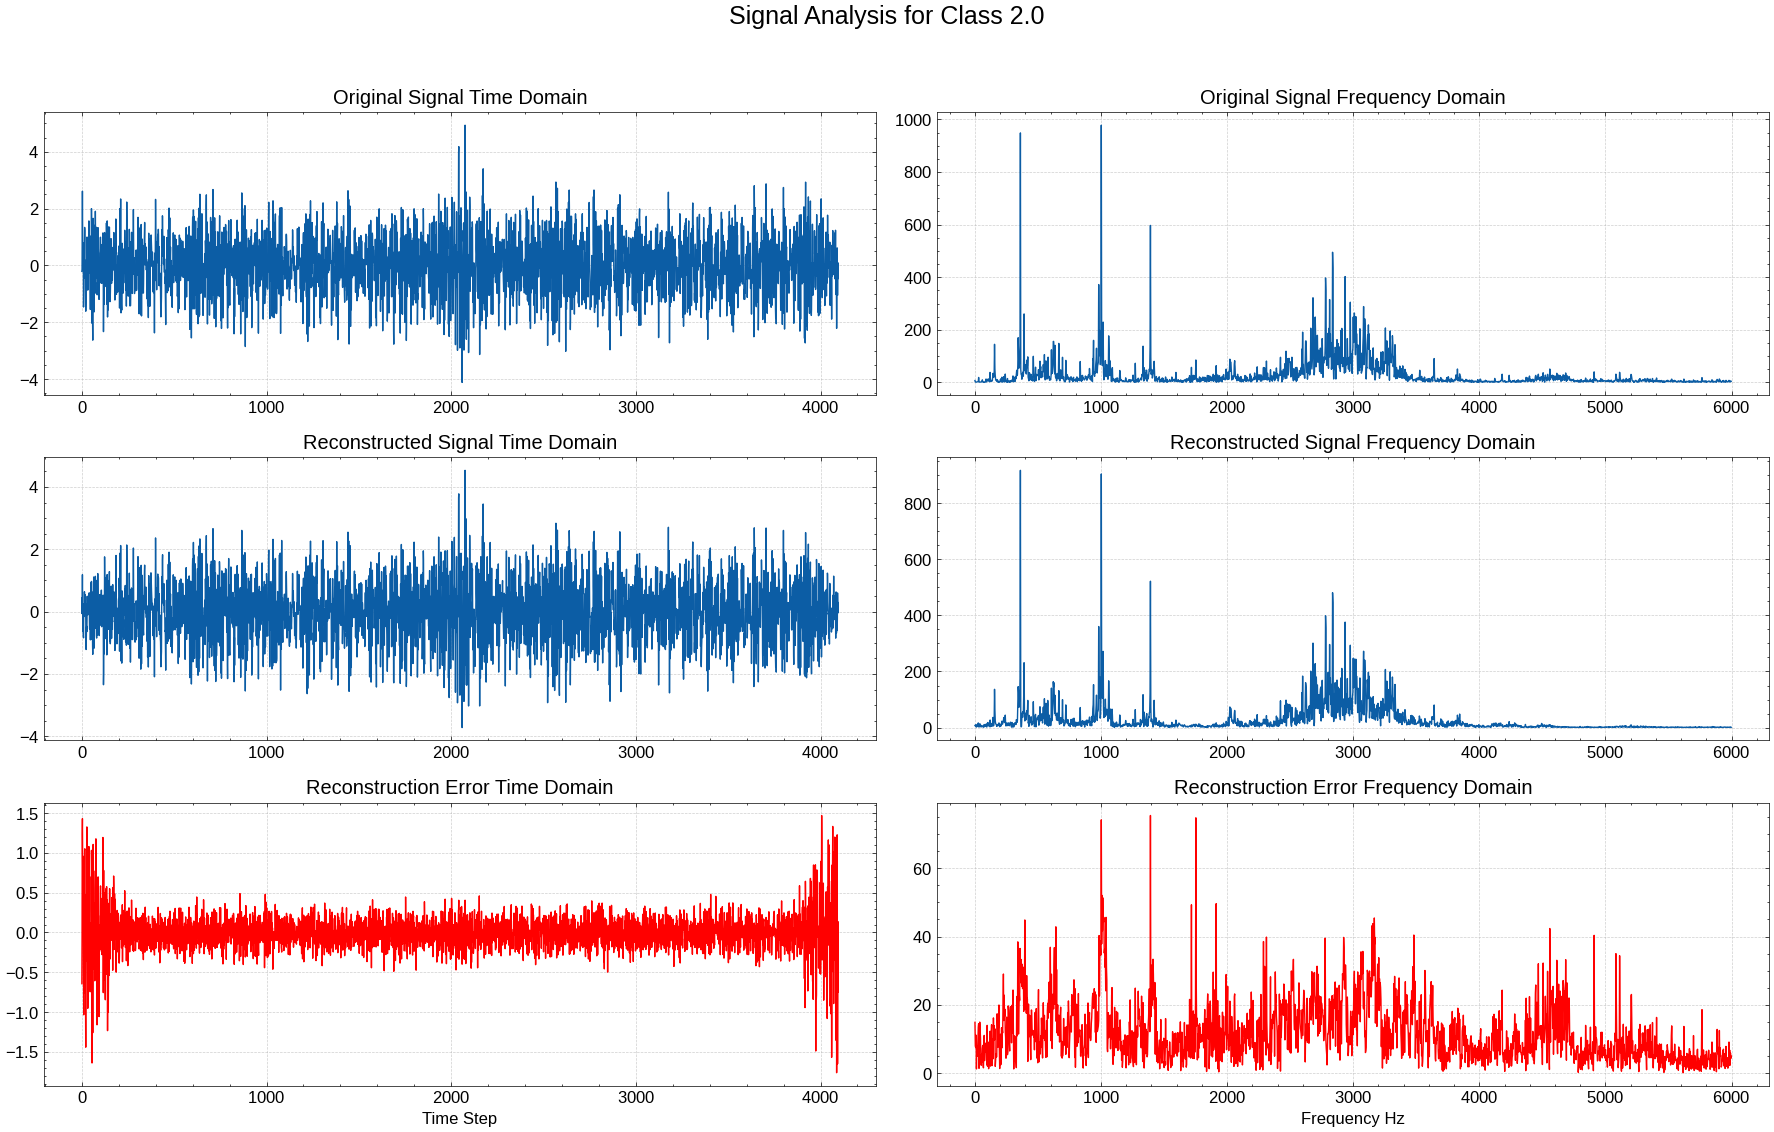

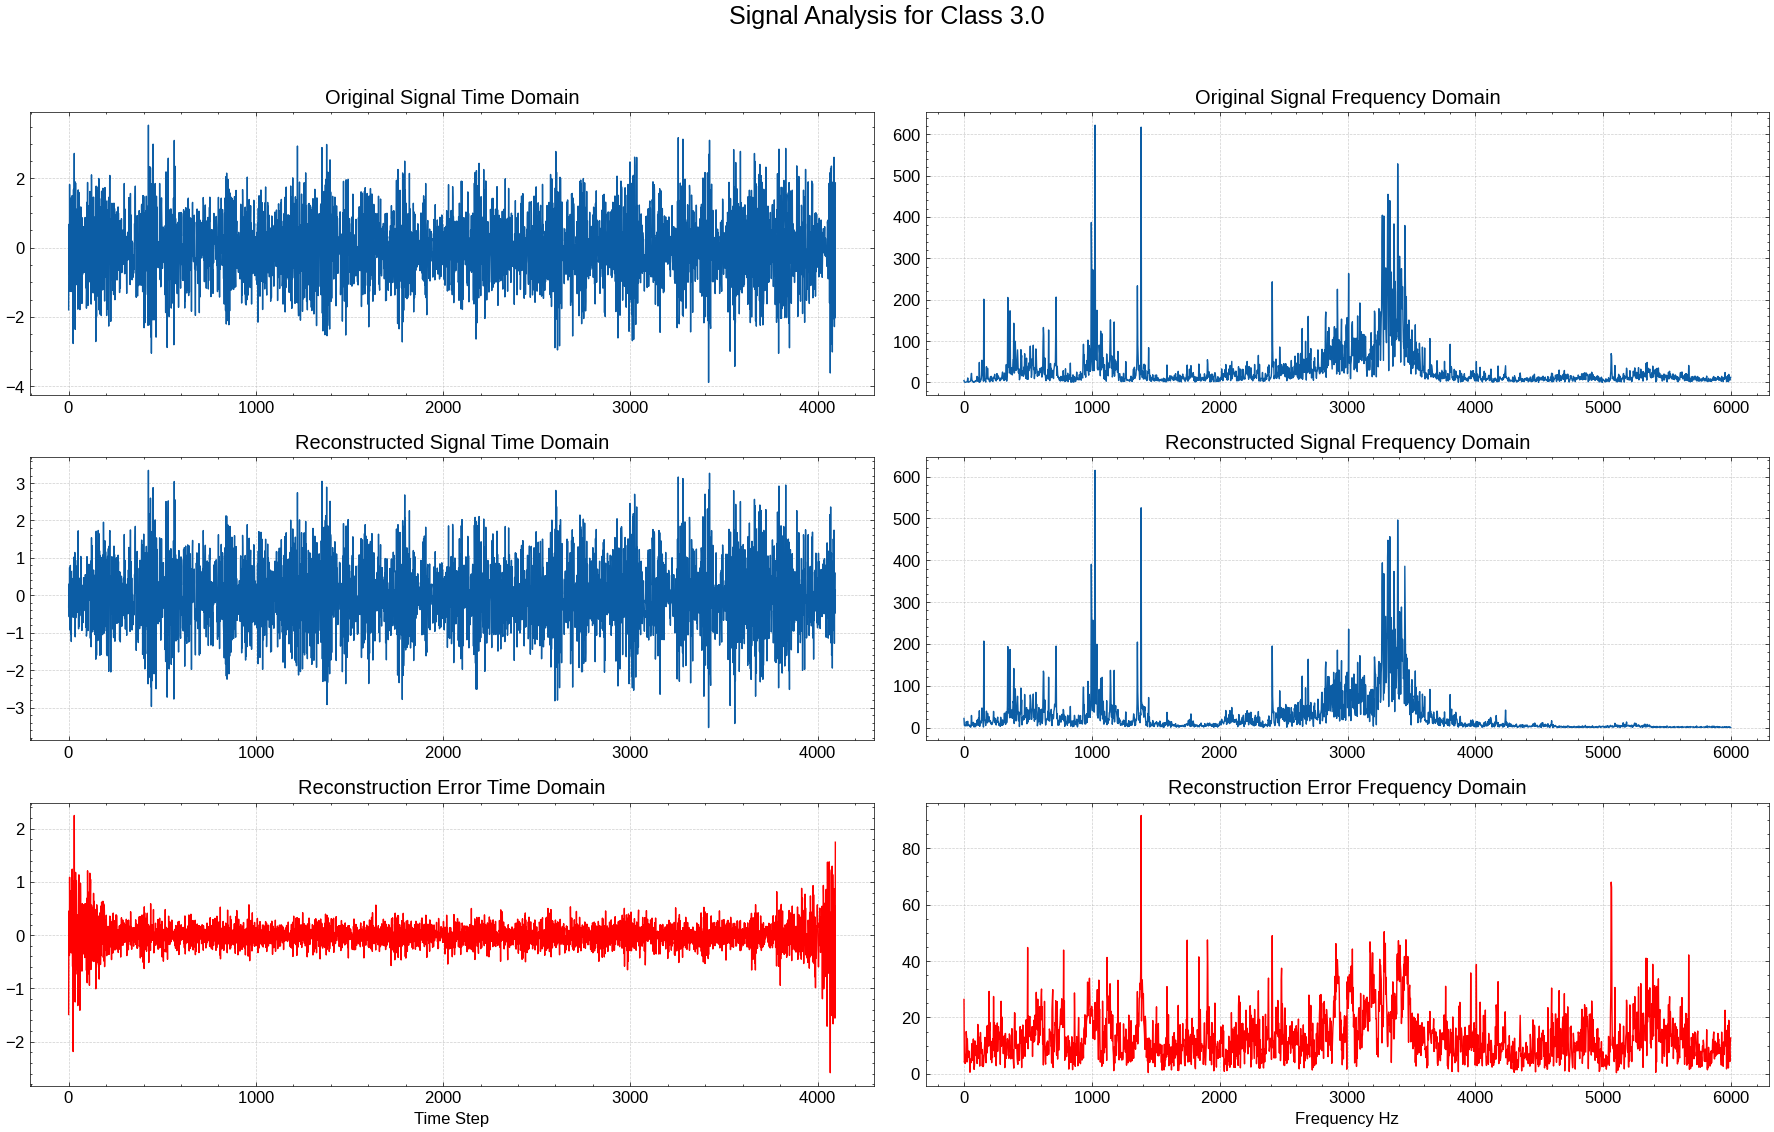

In [48]:
import numpy.fft as fft

for label, (original_tensor, reconstructed, error) in samples_to_plot.items():
    # Convert tensors to numpy arrays for plotting
    original = original_tensor.squeeze().cpu().numpy()
    
    # If the signal is multi-channel, plot only the first channel
    if original.ndim > 1:
        original = original[:,0]
        reconstructed = reconstructed[:,0]
        error = error[:,0]

    # --- Create a 3x2 subplot layout for Time and Frequency domains ---
    fig, axes = plt.subplots(3, 2, figsize=(18, 12))
    fig.suptitle(f'Signal Analysis for Class {label}', fontsize=18)
    
    # --- Column 1: Time Domain Plots ---
    # Plot Original Signal
    axes[0, 0].plot(original)
    axes[0, 0].set_title('Original Signal Time Domain')
    axes[0, 0].grid(True, linestyle='--', alpha=0.6)
    
    # Plot Reconstructed Signal
    axes[1, 0].plot(reconstructed)
    axes[1, 0].set_title('Reconstructed Signal Time Domain')
    axes[1, 0].grid(True, linestyle='--', alpha=0.6)

    # Plot Reconstruction Error
    axes[2, 0].plot(error, color='red')
    axes[2, 0].set_title('Reconstruction Error Time Domain')
    axes[2, 0].set_xlabel('Time Step')
    axes[2, 0].grid(True, linestyle='--', alpha=0.6)

    # --- Column 2: Frequency Domain (FFT) Plots ---
    # !!! IMPORTANT: Set the correct sampling frequency for your dataset !!!
    # CWRU is often 12000 Hz or 48000 Hz.
    fs = 12000  # Sampling Frequency in Hz
    n = len(original)  # Signal length
    
    # Calculate frequency axis
    freq_axis = fft.fftfreq(n, d=1/fs)[:n//2]
    
    # Calculate FFT and magnitude
    original_fft = np.abs(fft.fft(original))[:n//2]
    reconstructed_fft = np.abs(fft.fft(reconstructed))[:n//2]
    error_fft = np.abs(fft.fft(error))[:n//2]

    # Plot Original Signal Spectrum
    axes[0, 1].plot(freq_axis, original_fft)
    axes[0, 1].set_title('Original Signal Frequency Domain')
    axes[0, 1].grid(True, linestyle='--', alpha=0.6)

    # Plot Reconstructed Signal Spectrum
    axes[1, 1].plot(freq_axis, reconstructed_fft)
    axes[1, 1].set_title('Reconstructed Signal Frequency Domain')
    axes[1, 1].grid(True, linestyle='--', alpha=0.6)

    # Plot Error Spectrum
    axes[2, 1].plot(freq_axis, error_fft, color='red')
    axes[2, 1].set_title('Reconstruction Error Frequency Domain')
    axes[2, 1].set_xlabel('Frequency Hz')
    axes[2, 1].grid(True, linestyle='--', alpha=0.6)

    # --- Save and Show Plot ---
    plt.tight_layout(rect=[0, 0.03, 1, 0.96])
    
    # Save the figure
    save_dir = 'save/reconstruction_fft'
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    plt.savefig(f'{save_dir}/analysis_class_{label}.png', dpi=300, bbox_inches='tight')
    plt.savefig(f'{save_dir}/analysis_class_{label}.pdf', bbox_inches='tight')
    
    plt.show()

### hidden umap

## pretraining | masked prediction

## zero-shot umap

### 2